**Import Library Kaggle**

---

Pertama kita import library kaggle untuk mendownload dataset kita

In [1]:
!pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"yourbeagle","key":"f02c85b9e7db1548472d4345258abe36"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [4]:
!kaggle datasets download -d akpmpr/google-stock-price-all-time -p /content/sample_data/ --unzip

  0% 0.00/135k [00:00<?, ?B/s]
100% 135k/135k [00:00<00:00, 54.3MB/s]


**Import semua library yang dibutuhkan**

In [5]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor

**Menampilkan DataFrame**

Menampilkan DataFrame dan mengubah Columns Date menjadi index kita

In [6]:
df = pd.read_csv("/content/sample_data/google.csv", parse_dates=['Date'], index_col='Date')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2004-08-19,51.835709,47.800831,49.813290,49.982655,44871361.0,49.982655
2004-08-20,54.336334,50.062355,50.316402,53.952770,22942874.0,53.952770
2004-08-23,56.528118,54.321388,55.168217,54.495735,18342897.0,54.495735
2004-08-24,55.591629,51.591621,55.412300,52.239197,15319808.0,52.239197
2004-08-25,53.798351,51.746044,52.284027,52.802086,9232276.0,52.802086
...,...,...,...,...,...,...
2021-10-05,2747.239990,2680.000000,2680.000000,2723.540039,1206300.0,2723.540039
2021-10-06,2757.040039,2689.729980,2692.510010,2747.080078,988200.0,2747.080078
2021-10-07,2803.089111,2771.260010,2777.260010,2783.709961,912500.0,2783.709961


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4317 entries, 2004-08-19 to 2021-10-11
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       4317 non-null   float64
 1   Low        4317 non-null   float64
 2   Open       4317 non-null   float64
 3   Close      4317 non-null   float64
 4   Volume     4317 non-null   float64
 5   Adj Close  4317 non-null   float64
dtypes: float64(6)
memory usage: 236.1 KB


**Deskripsi Variabel**

* Date : Tanggal perdagangan berlangsung
* Open : Harga pembukaan pada tanggal perdangangan berlangsung
* High : Harga tertinggi pada tanggal perdangangan berlangsung
* Low : Harga terendah pada tanggal perdangangan berlangsung
* Close : Harga terakhir pada saat perdangan pada hari itu di tutup
* Adj Close : Harga penutupan pada hari tersebut setelah disesuaikan
* Volume : Volume transaksi yang terjadi pada tanggal perdagangan berlangsung

**Mengecek apakah ada nilai null pada data yang digunakan**

In [8]:
df.isnull().sum()

High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [9]:
high = (df.High == 0).sum()
low = (df.Low == 0).sum()
open = (df.Open == 0).sum()
close = (df.Close == 0).sum()
vol = (df.Volume == 0).sum()
adj = (df['Adj Close'] == 0).sum()


print(high,low,open,close,vol,adj)

0 0 0 0 0 0


**Melihat Deskripsi statistika pada dataset yang digunakan**

In [10]:
df.describe()

,High,Low,Open,Close,Volume,Adj Close
count,4317.000000,4317.000000,4317.000000,4317.000000,4.317000e+03,4317.000000
mean,639.682936,627.615621,633.603748,633.852357,6.523837e+06,633.852357
std,561.783142,552.069438,556.527532,557.255541,7.830526e+06,557.255541
min,50.680038,47.800831,49.409801,49.818268,7.922000e+03,49.818268
25%,247.507278,241.469910,244.832306,244.334183,1.593563e+06,244.334183
50%,401.988251,395.168823,399.004425,398.561096,3.851583e+06,398.561096
75%,933.440002,923.030029,929.059998,928.799988,8.268878e+06,928.799988
max,2936.409912,2912.290039,2918.989990,2916.840088,8.254163e+07,2916.840088


# **Visualisasi Data**

In [11]:
numerical_cols = ["High", "Low", "Open", "Close", "Volume", "Adj Close"]

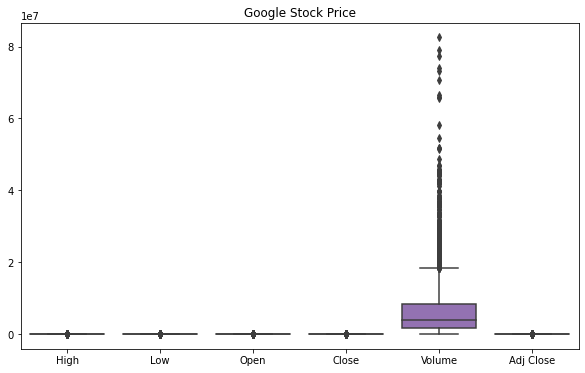

In [12]:
plt.subplots(figsize=(10,6))
sns.boxplot(data=df[numerical_cols]).set_title("Google Stock Price")
plt.show()

In [13]:
Q1 = df.quantile(0.35)
Q3 = df.quantile(0.85)
IQR=Q3-Q1
df=df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]
 
# Cek ukuran dataset setelah kita drop outliers
df.shape

(4123, 6)

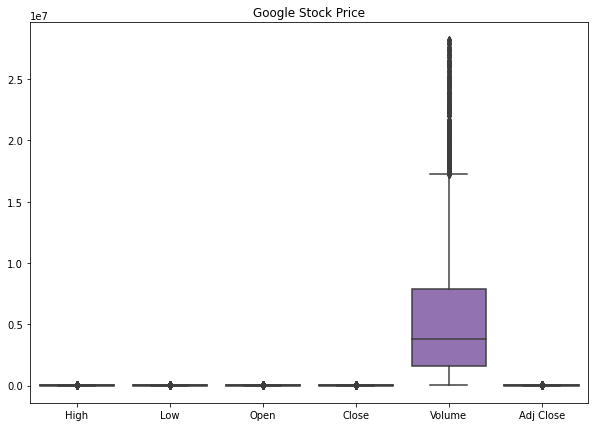

In [14]:
plt.subplots(figsize=(10,7))
sns.boxplot(data=df[numerical_cols]).set_title("Google Stock Price")
plt.show()

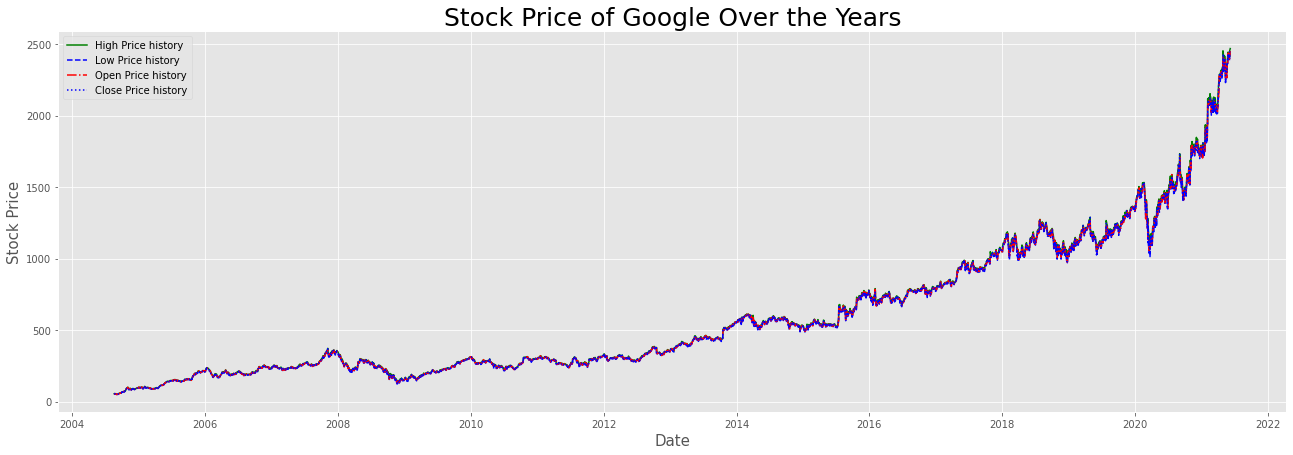

In [15]:
plt.style.use("ggplot")
plt.figure(figsize=(22,7))
plt.plot(df['High'], label='High Price history',color='g', linestyle="-")
plt.plot(df['Low'], label='Low Price history',color='b', linestyle="--")
plt.plot(df['Open'], label='Open Price history',color='r', linestyle="-.")
plt.plot(df['Close'], label='Close Price history',color='b', linestyle=":")


plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Stock Price of Google Over the Years',size=25);
plt.legend()
plt.show()

# **Univariate Analysis**

Fitur yang akan diprediksi pada kasus ini terfokus kepada fitur 'Close'

<function matplotlib.pyplot.show(*args, **kw)>

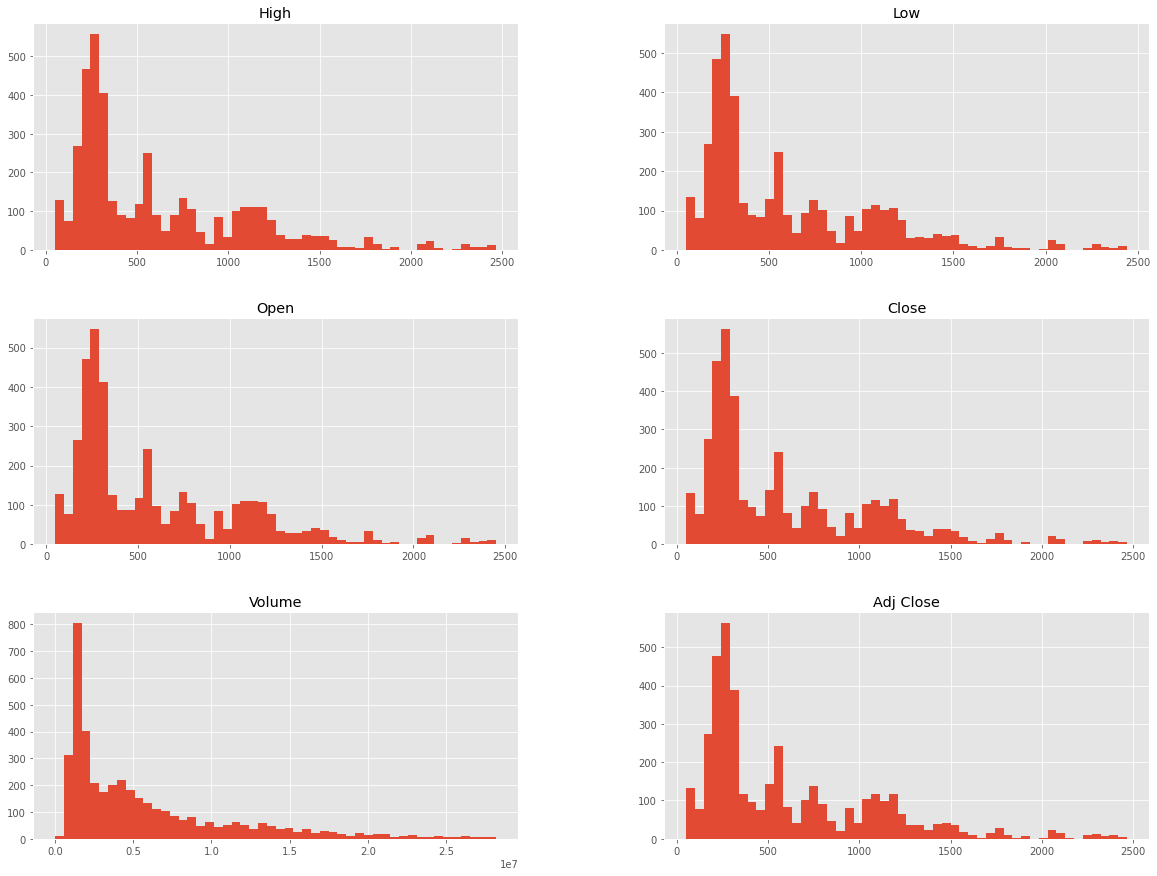

In [16]:
df.hist(bins=50, figsize=(20,15))
plt.show

# **Multivariate Analysis**

Dapat kita simpulkan bahwa fitur 'Close' memiliki terkaitan antara fitur 'Open', 'Low', 'High', dan juga 'Adj Close' namun tidak dengan fitur 'Volume'

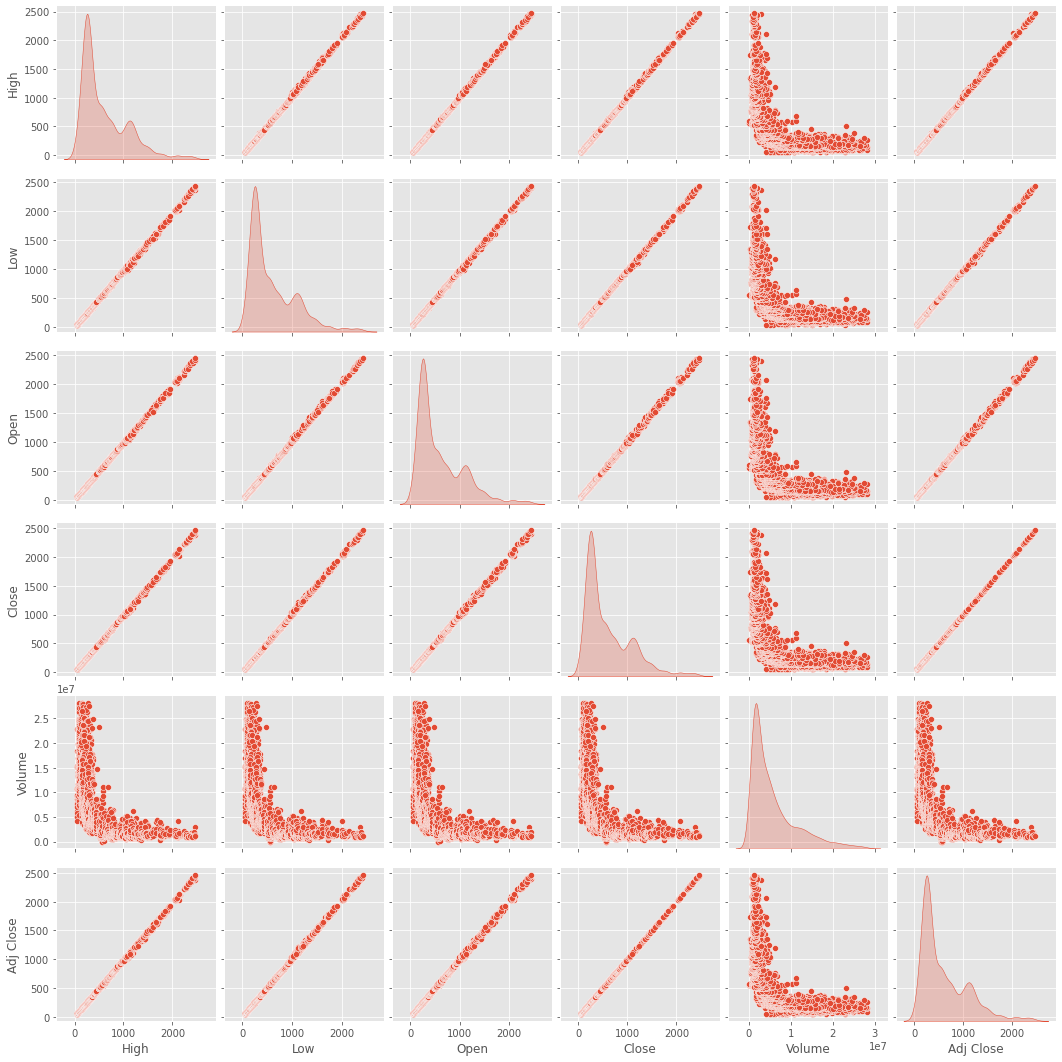

In [17]:
sns.pairplot(df[numerical_cols], diag_kind='kde')
plt.show()

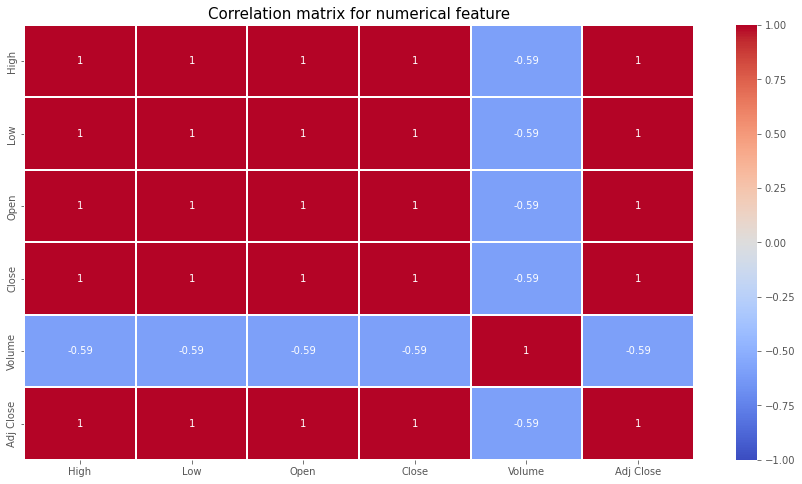

In [18]:
plt.figure(figsize=(15,8))
corr = df[numerical_cols].corr().round(2)
sns.heatmap(data=corr, annot=True, vmin=-1, vmax=1, cmap='coolwarm', linewidth=1)
plt.title('Correlation matrix for numerical feature', size=15)
plt.show()

In [19]:
df = df.drop(['Volume', 'Adj Close'], axis=1)
df.head()

,High,Low,Open,Close
Date,,,,
2004-08-20,54.336334,50.062355,50.316402,53.952770
2004-08-23,56.528118,54.321388,55.168217,54.495735
2004-08-24,55.591629,51.591621,55.412300,52.239197
2004-08-25,53.798351,51.746044,52.284027,52.802086
2004-08-26,53.773445,52.134586,52.279045,53.753517


# **Membagi Dataset**

In [114]:
x = df.iloc[:, 0:].values
y = df.iloc[:,-1].values
print(x)

[[  54.33633423   50.06235504   50.31640244   53.95277023]
 [  56.52811813   54.32138824   55.16821671   54.49573517]
 [  55.59162903   51.5916214    55.41230011   52.23919678]
 ...
 [2409.74511719 2382.83007812 2395.02001953 2404.61010742]
 [2453.85888672 2417.77001953 2422.52001953 2451.76000977]
 [2468.         2441.07299805 2451.32006836 2466.09008789]]


In [115]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=52)

In [116]:
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

3298
825
3298
825


# **Normalisasi Data**

Disini saya menggunakan library MinMaxScaler untuk melakukan normalisasi data, fungsi dari normalisasi data sendiri untuk mempermudah model dalam mempelajari data kita karena data diubah menjadi kebentuk antara 0 sampai dengan 1

In [117]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [118]:
print(x_train, x_test)

[[0.66074869 0.6610222  0.66550372 0.65568808]
 [0.08886139 0.08899292 0.08991199 0.08865424]
 [0.09566818 0.09544298 0.09679113 0.09567424]
 ...
 [0.06947757 0.06550029 0.07036546 0.06478618]
 [0.29228166 0.2940979  0.29334993 0.291067  ]
 [0.08624418 0.08567313 0.08661448 0.08553285]] [[0.41811893 0.42313059 0.41750237 0.4228445 ]
 [0.30936415 0.30986506 0.30574757 0.31287152]
 [0.07245622 0.06906451 0.0678348  0.07247793]
 ...
 [0.09178677 0.09151782 0.09007142 0.09161403]
 [0.07835004 0.0782796  0.07756723 0.07863893]
 [0.21182093 0.21363687 0.21174451 0.21412609]]


In [119]:
models = pd.DataFrame(columns=['train_mse', 'test_mse'], index=['Gradient Boosting', 'KNN', 'Random Forest'])

# **Pembuatan Model**

Disini saya menggunakan Hyperparameter dan GridSearch, penggunaan hyperparameter dan GridSearch Sendiri berguna untuk kita, karena dengan menggunakan hyperparameter dan Gridsearch dapat menentukan parameter model terbaik untuk melakukan pelatihan model kita

In [120]:
def grid_search(model, hyperparameters):
  results = GridSearchCV(
      model,
      hyperparameters,
      cv=5,
      verbose = 1,
      n_jobs = -1,
  )

  return results

In [121]:
gradient_boost = GradientBoostingRegressor()
hyperparameters = {
    'learning_rate': [0.1, 0.01, 0.001, 0.0001, 0.00001],
    'n_estimators': [250, 500, 750, 1000],
    'criterion': ['friedman_mse', 'squared_error'],
}
gradient_boost_search = grid_search(gradient_boost, hyperparameters)
gradient_boost_search.fit(x_train, y_train)
print(gradient_boost_search.best_estimator_)
print(gradient_boost_search.best_params_)
print(gradient_boost_search.best_score_)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
GradientBoostingRegressor(learning_rate=0.01, n_estimators=1000)
{'criterion': 'friedman_mse', 'learning_rate': 0.01, 'n_estimators': 1000}
0.9999866958491606


In [122]:
dfgb = pd.DataFrame(gradient_boost_search.cv_results_)
dfgb.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_learning_rate,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.608700,0.252405,0.004122,0.000167,friedman_mse,0.1,250,"{'criterion': 'friedman_mse', 'learning_rate':...",0.999950,0.999963,0.999949,0.999937,0.999952,0.999950,0.000008,9
1,3.066845,0.284394,0.007092,0.000162,friedman_mse,0.1,500,"{'criterion': 'friedman_mse', 'learning_rate':...",0.999956,0.999944,0.999963,0.999947,0.999952,0.999952,0.000007,8
2,4.375412,0.028150,0.010217,0.000751,friedman_mse,0.1,750,"{'criterion': 'friedman_mse', 'learning_rate':...",0.999919,0.999972,0.999967,0.999943,0.999964,0.999953,0.000020,7
3,6.367811,0.585997,0.020928,0.010607,friedman_mse,0.1,1000,"{'criterion': 'friedman_mse', 'learning_rate':...",0.999964,0.999976,0.999967,0.999955,0.999970,0.999967,0.000007,5
4,1.399163,0.026237,0.005070,0.000243,friedman_mse,0.01,250,"{'criterion': 'friedman_mse', 'learning_rate':...",0.992646,0.991962,0.992550,0.992517,0.991850,0.992305,0.000330,15


In [123]:
dfgb[['param_criterion','param_learning_rate', 'param_n_estimators','mean_test_score']]

,param_criterion,param_learning_rate,param_n_estimators,mean_test_score
0,friedman_mse,0.1,250,0.999950
1,friedman_mse,0.1,500,0.999952
2,friedman_mse,0.1,750,0.999953
3,friedman_mse,0.1,1000,0.999967
4,friedman_mse,0.01,250,0.992305
5,friedman_mse,0.01,500,0.999916
6,friedman_mse,0.01,750,0.999984
7,friedman_mse,0.01,1000,0.999987
8,friedman_mse,0.001,250,0.386303
9,friedman_mse,0.001,500,0.623211


In [129]:
knn_model = KNeighborsRegressor()
hyperparameters = {
    'n_neighbors': [1,2,3,4,5,6,7,8,9,10],
}

knn_search = grid_search(knn_model, hyperparameters)
knn_search.fit(x_train, y_train)
print(knn_search.best_estimator_)
print(knn_search.best_params_)
print(knn_search.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
KNeighborsRegressor(n_neighbors=2)
{'n_neighbors': 2}
0.9999497596292288


In [127]:
dfknn = pd.DataFrame(knn_search.cv_results_)
dfknn

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003197,0.001422,0.003599,0.001268,1,{'n_neighbors': 1},0.999931,0.999936,0.999945,0.999945,0.999932,0.999938,0.000006,5
1,0.002590,0.000200,0.003435,0.000289,2,{'n_neighbors': 2},0.999953,0.999949,0.999953,0.999959,0.999935,0.999950,0.000008,1
2,0.002668,0.000388,0.003595,0.000159,3,{'n_neighbors': 3},0.999952,0.999948,0.999956,0.999961,0.999917,0.999947,0.000015,3
3,0.003310,0.001439,0.004293,0.001718,4,{'n_neighbors': 4},0.999954,0.999944,0.999954,0.999956,0.999926,0.999947,0.000011,2
4,0.002428,0.000085,0.003601,0.000090,5,{'n_neighbors': 5},0.999947,0.999939,0.999948,0.999954,0.999927,0.999943,0.000009,4
5,0.002543,0.000134,0.004013,0.000245,6,{'n_neighbors': 6},0.999932,0.999926,0.999940,0.999950,0.999914,0.999932,0.000012,6
6,0.002516,0.000081,0.004019,0.000096,7,{'n_neighbors': 7},0.999916,0.999912,0.999930,0.999946,0.999910,0.999923,0.000014,7
7,0.002573,0.000129,0.003892,0.000159,8,{'n_neighbors': 8},0.999904,0.999893,0.999920,0.999939,0.999892,0.999910,0.000018,8
8,0.002693,0.000110,0.004855,0.001045,9,{'n_neighbors': 9},0.999899,0.999877,0.999915,0.999928,0.999875,0.999899,0.000021,9
9,0.002624,0.000205,0.004661,0.000974,10,{'n_neighbors': 10},0.999902,0.999862,0.999903,0.999919,0.999862,0.999890,0.000023,10


In [128]:
dfknn[['param_n_neighbors','mean_test_score']]

,param_n_neighbors,mean_test_score
0,1,0.999938
1,2,0.999950
2,3,0.999947
3,4,0.999947
4,5,0.999943
5,6,0.999932
6,7,0.999923
7,8,0.999910
8,9,0.999899
9,10,0.999890


In [130]:
rdForest = RandomForestRegressor()
hyperparameters = {
    'n_estimators' : [10, 25, 50, 75, 100],
    'criterion' : ['squared_error', 'absolute_error', 'poisson'],
}

rdForestSearch = grid_search(rdForest, hyperparameters)
rdForestSearch.fit(x_train, y_train)
print(rdForestSearch.best_estimator_)
print(rdForestSearch.best_params_)
print(rdForestSearch.best_score_)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
RandomForestRegressor(criterion='absolute_error')
{'criterion': 'absolute_error', 'n_estimators': 100}
0.999980958710555


In [131]:
dfrdForest = pd.DataFrame(rdForestSearch.cv_results_)
dfrdForest

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.123493,0.007706,0.005037,0.000378,squared_error,10,"{'criterion': 'squared_error', 'n_estimators':...",0.999977,0.999985,0.999976,0.999973,0.999985,0.999979,0.000005,5
1,0.292572,0.004248,0.009938,0.000384,squared_error,25,"{'criterion': 'squared_error', 'n_estimators':...",0.999982,0.999982,0.999976,0.999967,0.999979,0.999977,0.000006,9
2,0.587026,0.009040,0.020074,0.003530,squared_error,50,"{'criterion': 'squared_error', 'n_estimators':...",0.999979,0.999984,0.999978,0.999974,0.999983,0.999980,0.000003,3
3,0.875718,0.013077,0.029214,0.002555,squared_error,75,"{'criterion': 'squared_error', 'n_estimators':...",0.999984,0.999982,0.999982,0.999976,0.999968,0.999978,0.000006,7
4,1.165061,0.017936,0.036854,0.002228,squared_error,100,"{'criterion': 'squared_error', 'n_estimators':...",0.999981,0.999983,0.999981,0.999971,0.999982,0.999980,0.000005,4
5,1.363865,0.022052,0.004835,0.000133,absolute_error,10,"{'criterion': 'absolute_error', 'n_estimators'...",0.999967,0.999983,0.999964,0.999970,0.999983,0.999974,0.000008,10
6,3.363819,0.026575,0.010454,0.000801,absolute_error,25,"{'criterion': 'absolute_error', 'n_estimators'...",0.999975,0.999987,0.999982,0.999973,0.999983,0.999980,0.000005,2
7,6.743585,0.074972,0.018814,0.000851,absolute_error,50,"{'criterion': 'absolute_error', 'n_estimators'...",0.999977,0.999985,0.999979,0.999978,0.999970,0.999978,0.000005,8
8,10.156780,0.061412,0.026983,0.000138,absolute_error,75,"{'criterion': 'absolute_error', 'n_estimators'...",0.999979,0.999985,0.999978,0.999970,0.999980,0.999978,0.000005,6
9,13.284469,0.322586,0.035074,0.000720,absolute_error,100,"{'criterion': 'absolute_error', 'n_estimators'...",0.999982,0.999985,0.999982,0.999978,0.999978,0.999981,0.000003,1


In [132]:
dfrdForest[['param_criterion','param_n_estimators','mean_test_score','rank_test_score']]

,param_criterion,param_n_estimators,mean_test_score,rank_test_score
0,squared_error,10,0.999979,5
1,squared_error,25,0.999977,9
2,squared_error,50,0.999980,3
3,squared_error,75,0.999978,7
4,squared_error,100,0.999980,4
5,absolute_error,10,0.999974,10
6,absolute_error,25,0.999980,2
7,absolute_error,50,0.999978,8
8,absolute_error,75,0.999978,6
9,absolute_error,100,0.999981,1


# **Model Training**

In [133]:
gradient_boost = GradientBoostingRegressor(criterion='friedman_mse', learning_rate=0.01, n_estimators=1000)
gradient_boost.fit(x_train, y_train)

GradientBoostingRegressor(learning_rate=0.01, n_estimators=1000)

In [134]:
knn = KNeighborsRegressor(n_neighbors=2)
knn.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=2)

In [135]:
randomForest = RandomForestRegressor(criterion='absolute_error', n_estimators=100)
randomForest.fit(x_train, y_train)

RandomForestRegressor(criterion='absolute_error')

In [136]:
model_dict = {
    'Gradient Boosting':gradient_boost,
    'KNN':knn,
    'Random Forest':randomForest,
}

for name,model in model_dict.items():
  models.loc[name, 'train_mse'] = mean_squared_error(y_train, model.predict(x_train))
  models.loc[name, 'test_mse'] = mean_squared_error(y_test, model.predict(x_test))

models

,train_mse,test_mse
Gradient Boosting,0.04567,283.120023
KNN,3.313787,197.689145
Random Forest,0.556372,257.052693


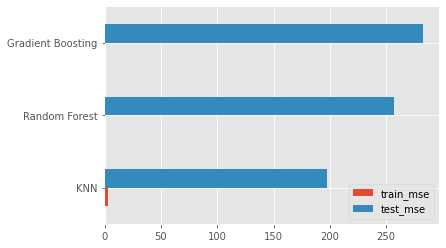

In [140]:
models.sort_values(by='test_mse', ascending=True).plot(kind="barh", zorder=3)

In [138]:
gradientBoostAcc = gradient_boost.score(x_test, y_test)*100
randomForestAcc = randomForest.score(x_test, y_test)*100
knnAcc = knn.score(x_test, y_test)*100

In [139]:
eval_list = [[gradientBoostAcc],[randomForestAcc],[knnAcc]]
eval = pd.DataFrame(eval_list,
                    columns=['Acc (%)'],
                    index=['Gradient Boosting','Random Forest','K-Nearest Neighbor'])
eval

,Acc (%)
Gradient Boosting,99.861565
Random Forest,99.874311
K-Nearest Neighbor,99.903338


Dari hasil evaluasi di atas dapat kita simpulkan bahwa ketiga model memiliki performa yang hampir menyentuh angka sempurna yaitu 100%, Dimana dapat dilihat juga bahwa model KNN memiliki performa yang paling tinggi yaitu 99.90% dan disusul oleh kedua model lainnya yaitu Random Forest dengan 99.87% dan Gradient Boosting dengan 99.86%

In [142]:
prediksi = x_test[:1].copy()
pred_dict = {'y_true':y_test[:1]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)
 
pd.DataFrame(pred_dict)

,y_true,prediksi_Gradient Boosting,prediksi_KNN,prediksi_Random Forest
0,1046.400024,1071.9,1063.2,1071.6


Berikut adalah hasil prediksi mendekati nilai asli didadapatkan oleh model KNN